# SVM и его ядра
__Суммарное количество баллов: 10__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from time import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Задание 1 (7 баллов)

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [2]:
def read_dataset(path_to_csv, cancer = False, split = False, train_size = 0.8, random_state = None):
    data = pd.read_csv(path_to_csv)
    if cancer:
        data['label'] = (data['label'] == 'M').astype(int)
    X = data.drop("label", axis=1)
    y = data.label
    if not split:
        return X, y
#     X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size, random_state = random_state)
    return X_train, X_test, y_train, y_test

In [3]:
def make_svm_clf(X, y, kernel = 'rbf', degree = 3):
    clf = SVC(kernel=kernel, degree = degree)
    clf.fit(X, y)    
    return clf

In [4]:
def draw(X, y, clfs):
    # Plotting decision regions
    x_min, x_max = X.iloc[:, 0].min() - 3, X.iloc[:, 0].max() + 3
    y_min, y_max = X.iloc[:, 1].min() - 3, X.iloc[:, 1].max() + 3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    f, axarr = plt.subplots(5, 1, sharex='col', sharey='row', figsize=(8, 40))

    for idx, clf, tt in zip([0, 1, 2, 3, 4],
                            clfs,
                            ['Линейное ядро', 'Полиномиальное ядро степени 2', 
                             'Полиномиальное ядро степени 3', 'Полиномиальное ядро степени 5', 'RBF']):

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        support_vectors = clf.support_vectors_.transpose()
        axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = 'plasma')
        axarr[idx].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y,
                                      s=10, edgecolor='k')
        axarr[idx].scatter(support_vectors[0], support_vectors[1], c ='r', s=10)
        axarr[idx].set_title(tt, fontsize=30)

    plt.show()

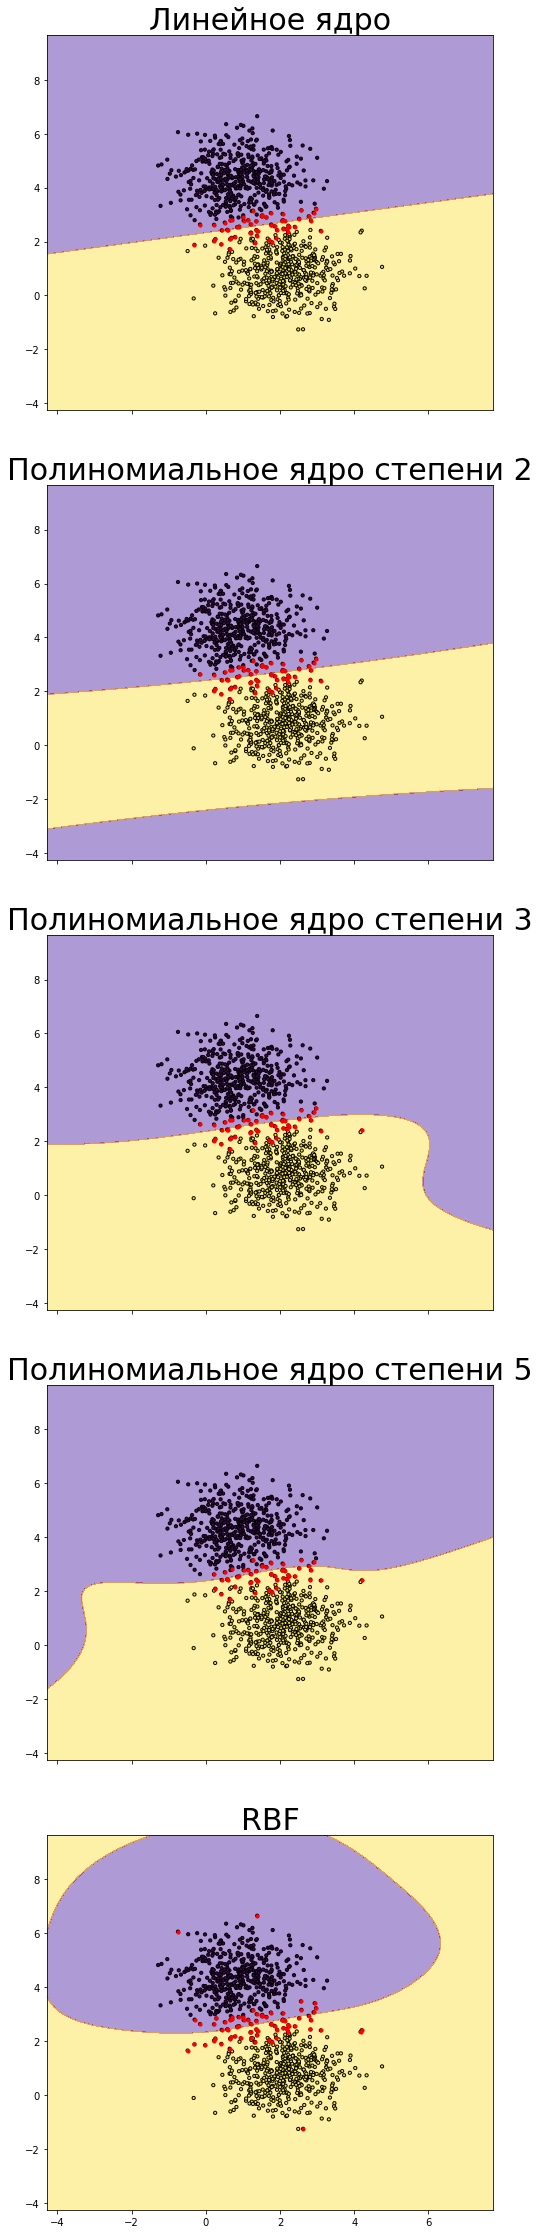

In [5]:
X, y = read_dataset('./data/blobs2.csv')
classifiers = []
classifiers.append(make_svm_clf(X, y, kernel = 'linear'))
classifiers.append(make_svm_clf(X, y, kernel = 'poly', degree = 2))
classifiers.append(make_svm_clf(X, y, kernel = 'poly', degree = 3))
classifiers.append(make_svm_clf(X, y, kernel = 'poly', degree = 5))
classifiers.append(make_svm_clf(X, y, kernel = 'rbf'))
draw(X, y, classifiers)

### Задание 2 (3 балла)

Примените метод SVM на датасетах cancer и spam, разбитый предварительно на train (80%) и validate (20%). 

Сравните время работы SVM и Random Forest при близкой точности.

In [6]:
def run_random_forrest(X_train, X_test, y_train, y_test, n_estimators=10, criterion="gini", max_depth=2):
    tic = time()
    rfc = RandomForestClassifier(n_estimators = n_estimators, criterion = criterion, max_depth = max_depth, random_state = 228)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    toc = time()
    score = accuracy_score(y_test, y_pred)
    print(f'RANDOM FORREST CLASSIFIER\nТочность: {score}\nВремя выполнения: {toc-tic} секунд\n\n')
    
    
     
    
def run_SVM(X_train, X_test, y_train, y_test, kernel = 'rbf', degree = 3):
    tic = time()
    clf = SVC(kernel=kernel, degree = degree)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    toc = time()
    score = accuracy_score(y_test, y_pred)
    print(f'SVM CLASSIFIER\nТочность: {score}\nВремя выполнения: {toc-tic} секунд')    
    

In [7]:
X_train, X_test, y_train, y_test = read_dataset('./data/cancer.csv', cancer = True, split = True, train_size = 0.8, random_state =9999)
run_random_forrest(X_train, X_test, y_train, y_test)
run_SVM(X_train, X_test, y_train, y_test, kernel = 'poly', degree = 2)

RANDOM FORREST CLASSIFIER
Точность: 0.9298245614035088
Время выполнения: 0.015679597854614258 секунд


SVM CLASSIFIER
Точность: 0.9210526315789473
Время выполнения: 0.004624843597412109 секунд


In [8]:
X_train, X_test, y_train, y_test = read_dataset('./data/spam.csv', split = True, train_size = 0.8, random_state = 1)
run_random_forrest(X_train, X_test, y_train, y_test, n_estimators=100, criterion="gini", max_depth=5)
run_SVM(X_train, X_test, y_train, y_test, kernel = 'linear')

RANDOM FORREST CLASSIFIER
Точность: 0.9294245385450597
Время выполнения: 0.462216854095459 секунд


SVM CLASSIFIER
Точность: 0.9305103148751357
Время выполнения: 319.4091942310333 секунд


##### Вывод: 

Линейное ядро работает очень долго (особенно на спаме), дольше чем РандомФорест, но при этом если взять полиномиальное или rbf все проходит в разы быстрее.